<a href="https://colab.research.google.com/github/AslanDevbrat/Geoinformatics/blob/main/Geo_assig_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/Geoinformatics/Lab/Data.zip


Archive:  /content/drive/MyDrive/Geoinformatics/Lab/Data.zip
replace Bhopal_Mask.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz

Archive:  /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz or
        /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz.zip, and cannot find /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz.ZIP, period.


In [ ]:
!mkdir L7
!tar -xvf  /content/LE07_L1TP_145044_20021210_20170127_01_T1.tar.gz -C /content/L7

mkdir: cannot create directory ‘L7’: File exists
LE07_L1TP_145044_20021210_20170127_01_T1_ANG.txt
LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B2.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B3.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B4.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B5.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B6_VCID_1.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B6_VCID_2.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B7.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_B8.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_BQA.TIF
LE07_L1TP_145044_20021210_20170127_01_T1_GCP.txt
LE07_L1TP_145044_20021210_20170127_01_T1_MTL.txt
README.GTF


In [ ]:
!mkdir L8
!tar -xvf  /content/LC08_L1TP_146044_20201226_20201226_01_RT.tar.gz -C /content/L8

mkdir: cannot create directory ‘L8’: File exists
LC08_L1TP_146044_20201226_20201226_01_RT_B1.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B2.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B3.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B4.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B5.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B6.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B7.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B8.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B9.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B10.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_B11.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_BQA.TIF
LC08_L1TP_146044_20201226_20201226_01_RT_ANG.txt
LC08_L1TP_146044_20201226_20201226_01_RT_MTL.txt


In [ ]:
!unzip Bhopal_Mask.zip

Archive:  Bhopal_Mask.zip
replace Bhopal_Mask/Bhopal_Mask.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install elevation
!pip install richdem
!pip install pysheds
!pip install plantcv
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.9).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [8]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation 
from matplotlib.pyplot import figure

## Working with Landsat 7 data

In [9]:
gdal_data = gdal.Open('/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF')
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

In [10]:
nodataval

In [11]:
data_array = gdal_data.ReadAsArray().astype(np.float)
np.amin(data_array)

0.0

In [19]:
arr = data_array.copy()

In [ ]:
# replace missing values if necessary
if np.any(data_array == 0):
    data_array[data_array == 0] = np.nan

In [ ]:
np.unique(data_array)
np.unique(data_array)
from matplotlib.pyplot import figure

NameError: ignored

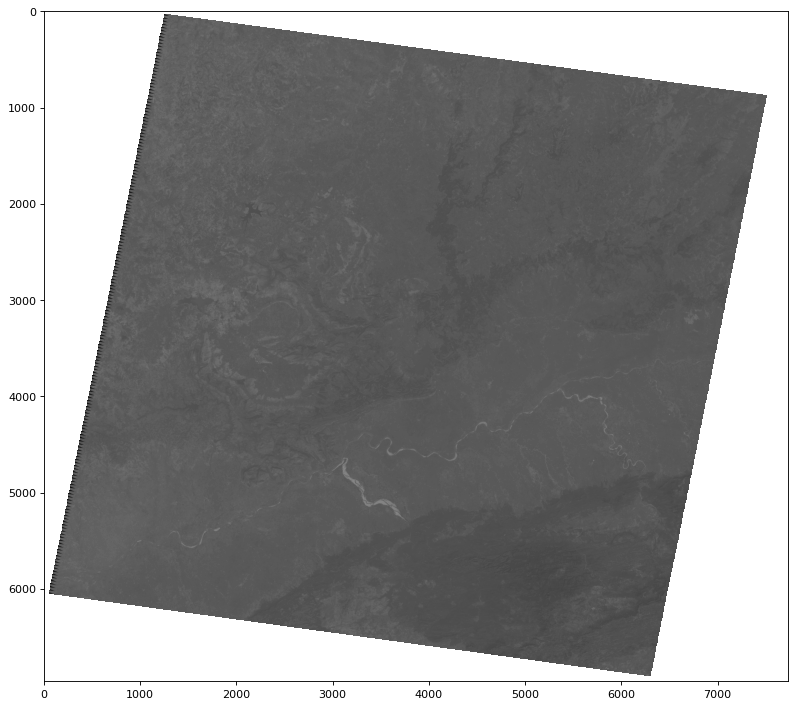

In [ ]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(data_array,cmap='gray')

## DN to radiance

### Gain and Bias Method
 - L = (DN * G) + B

In [21]:
"""
  Creating a  Dictionary with key as the "property" and value as 
  numerical value given in the file.
  example  {'REFLECTANCE_MULT_BAND_7 ': ' 1.6439E-03'}
"""

Landsat7_mlt_dict = {}
with open('/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_MTL.txt', 'r') as _:
    for line in _:
        line = line.strip()
        if line != 'END':
            key, value = line.split('=')
            Landsat7_mlt_dict[key] = value
print( Landsat7_mlt_dict)

{'GROUP ': ' PROJECTION_PARAMETERS', 'ORIGIN ': ' "Image courtesy of the U.S. Geological Survey"', 'REQUEST_ID ': ' "0501701260854_12305"', 'LANDSAT_SCENE_ID ': ' "LE71450442002344SGS00"', 'LANDSAT_PRODUCT_ID ': ' "LE07_L1TP_145044_20021210_20170127_01_T1"', 'COLLECTION_NUMBER ': ' 01', 'FILE_DATE ': ' 2017-01-27T07:00:32Z', 'STATION_ID ': ' "SGS"', 'PROCESSING_SOFTWARE_VERSION ': ' "LPGS_12.8.3"', 'DATA_CATEGORY ': ' "NOMINAL"', 'END_GROUP ': ' L1_METADATA_FILE', 'DATA_TYPE ': ' "L1TP"', 'COLLECTION_CATEGORY ': ' "T1"', 'ELEVATION_SOURCE ': ' "GLS2000"', 'OUTPUT_FORMAT ': ' "GEOTIFF"', 'EPHEMERIS_TYPE ': ' "DEFINITIVE"', 'SPACECRAFT_ID ': ' "LANDSAT_7"', 'SENSOR_ID ': ' "ETM"', 'SENSOR_MODE ': ' "SAM"', 'WRS_PATH ': ' 145', 'WRS_ROW ': ' 044', 'DATE_ACQUIRED ': ' 2002-12-10', 'SCENE_CENTER_TIME ': ' "05:02:30.1232290Z"', 'CORNER_UL_LAT_PRODUCT ': ' 24.07386', 'CORNER_UL_LON_PRODUCT ': ' 76.89248', 'CORNER_UR_LAT_PRODUCT ': ' 24.02871', 'CORNER_UR_LON_PRODUCT ': ' 79.17007', 'CORNER_LL

In [ ]:
channel_gain = float(Landsat7_mlt_dict['RADIANCE_MULT_BAND_'+'1 '])
channel_offset = float(Landsat7_mlt_dict['RADIANCE_ADD_BAND_1 '])
#print(type(channel_gain))
print(f"value of G {channel_gain}")
print(f"value of B {channel_offset}")

value of G 0.77874
value of B -6.97874


In [12]:
def dn_to_radiance(data_array, band)  :
  channel_gain = float(Landsat7_mlt_dict['RADIANCE_MULT_BAND_'+str(band)+' '])
  channel_offset = float(Landsat7_mlt_dict['RADIANCE_ADD_BAND_'+str(band)+' '])
  new_data_array = np.empty_like(data_array)
  for i,row in enumerate(data_array):
    for j, col in enumerate(row):
      if data_array[i][j] != np.nan:
        new_data_array[i][j] = data_array[i][j] * channel_gain +channel_offset
  print('radiance')
  return new_data_array

In [13]:
from math import cos
import math
def radiance_to_reflectance(arr,ESUN,):
  d = float(Landsat7_mlt_dict['EARTH_SUN_DISTANCE '])
  phi = 90 - float(Landsat7_mlt_dict['SUN_ELEVATION '])
  new_data_array = np.empty_like(arr)
  for i,row in enumerate(arr):
    for j, col in enumerate(row):
      if arr[i][j] != np.nan:
        new_data_array[i][j] = np.pi *arr[i][j] * d**2/ (ESUN *cos(phi*math.pi/180))
  print('reflectance')
  return new_data_array

In [14]:
from matplotlib.backends.backend_pgf import PdfPages
def plot_figure(arr, bands, output_filename):
  cols = ['DN ', 'DN to Radiance', 'Radiance to Reflectance']
  rows = bands
  matplotlib.rcParams.update({'font.size': 22})
  fig, ax = plt.subplots(len(arr) ,3,figsize=(35,35), dpi =100)

  for axes, col in zip(ax[0], cols):
    axes.set_title(col)

  for axes, row in zip(ax[:,0], rows):
      axes.set_ylabel(row, rotation=0, size='large',)

  im_ratio = np.array(arr).shape[0]/np.array(arr).shape[1] #
  #fig(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
  for i,band in enumerate(arr):
    for j, img in enumerate(band):
      im1 = ax[i, j].imshow(arr[i][j], cmap ='gray',) #row=0, col=0
      
      fig.colorbar(im1 ,ax=ax[i,j], fraction=0.065*im_ratio)
     
    print(i)
  fig.tight_layout(pad=1.5)
  plt.savefig(output_filename)
  plt.close()
  #plt.show()

In [17]:
radiance = dn_to_radiance(data_array,1)
reflectance = radiance_to_reflectance(radiance,1970)


NameError: ignored

In [ ]:
plot_figure([[data_array,radiance,reflectance],[data_array,data_array,data_array,]])

In [7]:
L7_images = ['/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B2.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B3.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B4.TIF',
         ]

ESUN_L7 = [1970, 1842, 1547, 1044]

In [ ]:
imagelist = list()
for i,img in enumerate(L7_images):
  gdal_data = gdal.Open(img)
  gdal_band = gdal_data.GetRasterBand(1)
 
  data_array = gdal_data.ReadAsArray().astype(np.float)

  # replace missing values if necessary
  if np.any(data_array == 0):
    data_array[data_array == 0] = np.nan
  if i <=4:
    radiance = dn_to_radiance(data_array,i+1)
    reflectance = radiance_to_reflectance(radiance,ESUN_L7[i])
  else:
    radiance = dn_to_radiance(data_array,i+2)
    reflectance = radiance_to_reflectance(radiance,ESUN_L7[i])
  imagelist.append([data_array,radiance, reflectance])
  np.save('nmpyarr', imagelist) 
  print(f'completed{i+1}')
  
plot_figure(imagelist, ['Band 1            ', 'Band 2            ','Band 3            ','Band 4            '])

radiance
reflectance
completed1
radiance
reflectance
completed2
radiance
reflectance
completed3
radiance
reflectance
completed4


NameError: ignored

In [ ]:
image_list_arr = np.load('/content/nmpyarr.npy')


In [ ]:
image_list_arr.shape

(4, 3, 6961, 7731)

In [ ]:
del image_list_arr

In [ ]:
plot_figure([image_list_arr[0],image_list_arr[1]], ['Band 1            ','Band 2            '], 'L7_B12.png')

0
1


In [ ]:
plot_figure(np.load('/content/nmpyarr.npy'), ['Band 1            ', 'Band 2            ','Band 3            ','Band 4            '],'L7_B1234.png')

0
1
2
3


In [ ]:
L7_images_2 = ['/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B5.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B7.TIF',
          
          
         ]

ESUN_L7_2 = [225.7,82.06]

imagelist_2 = list()
for i,img in enumerate(L7_images_2):
  gdal_data = gdal.Open(img)
  gdal_band = gdal_data.GetRasterBand(1)
 
  data_array = gdal_data.ReadAsArray().astype(np.float)

  # replace missing values if necessary
  if np.any(data_array == 0):
    data_array[data_array == 0] = np.nan
  if i <1:
    radiance = dn_to_radiance(data_array,i+1)
    reflectance = radiance_to_reflectance(radiance,ESUN_L7_2[i])
  else:
    radiance = dn_to_radiance(data_array,i+2)
    reflectance = radiance_to_reflectance(radiance,ESUN_L7_2[i])
  imagelist_2.append([data_array,radiance, reflectance])
  np.save('nmpyarr_2', imagelist_2) 
  print(f'completed{i+1}')
  


radiance
reflectance
completed1
radiance
reflectance
completed2


In [ ]:
plot_figure(np.load('/content/nmpyarr_2.npy'), ['Band 5            ', 'Band 7            '], 'L7_B57.png')

0
1


## Spectral radiance scaling

In [6]:
def dn_to_radiance_spectral(data_array, band)  :
  Lmax = float(Landsat7_mlt_dict['RADIANCE_MAXIMUM_BAND_'+str(band)+' '])
  Lmin = float(Landsat7_mlt_dict['RADIANCE_MINIMUM_BAND_'+str(band)+' '])
  DNmax = float(Landsat7_mlt_dict['QUANTIZE_CAL_MAX_BAND_'+str(band)+' '])
  DNmin = float(Landsat7_mlt_dict['QUANTIZE_CAL_MAX_BAND_'+str(band)+' '])
  new_data_array = np.empty_like(data_array)
  for i,row in enumerate(data_array):
    for j, col in enumerate(row):
      if data_array[i][j] != np.nan:
        new_data_array[i][j] = ((Lmax - Lmin)*(data_array[i][j] - DNmin)/(DNmax-DNmin)) + Lmin
  print('radiance')
  return new_data_array

In [22]:
radiance = dn_to_radiance_spectral(arr, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


radiance


/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


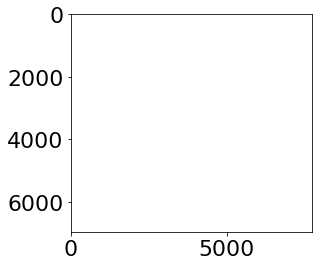

In [29]:
plt.imshow(radiance)

In [28]:
radiance.dtype

dtype('float64')

In [26]:
type(radiance)

numpy.ndarray

In [24]:
plot_figure([[arr, radiance, radiance_to_reflectance(radiance,1970)],[arr,arr,arr]],['Band 1       '],'test.png')

reflectance
0
1


In [9]:
L7_images = ['/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B1.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B2.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B3.TIF',
          '/content/L7/LE07_L1TP_145044_20021210_20170127_01_T1_B4.TIF',
         ]

ESUN_L7 = [1970, 1842, 1547, 1044]

imagelist = list()
for i,img in enumerate(L7_images):
  gdal_data = gdal.Open(img)
  gdal_band = gdal_data.GetRasterBand(1)
 
  data_array = gdal_data.ReadAsArray().astype(np.float)

  # replace missing values if necessary
  if np.any(data_array == 0):
    data_array[data_array == 0] = np.nan
  if i <=4:
    radiance = dn_to_radiance_spectral(data_array,i+1)
    reflectance = radiance_to_reflectance(radiance,ESUN_L7[i])
  else:
    radiance = dn_to_radiance_spectral(data_array,i+2)
    reflectance = radiance_to_reflectance(radiance,ESUN_L7[i])
  imagelist.append([data_array,radiance, reflectance])
  np.save('nmpyarr_3', imagelist) 
  print(f'completed{i+1}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


radiance
reflectance
completed1
radiance
reflectance
completed2
radiance
reflectance
completed3
radiance
reflectance
completed4


In [5]:
plot_figure(np.load('/content/nmpyarr_3.npy'), ['Band 1            ', 'Band 2            ','Band 3            ','Band 4            '],'L7_B1234._Spet.png')

0
1
2
3


## Landsat 8
### DN to Radiance

In [ ]:
"""
  Creating a  Dictionary with key as the "property" and value as 
  numerical value given in the file.
  example  {'REFLECTANCE_MULT_BAND_7 ': ' 1.6439E-03'}
"""

Landsat8_mlt_dict = {}
with open('/content/L8/LC08_L1TP_146044_20201226_20201226_01_RT_MTL.txt', 'r') as _:
    for line in _:
        line = line.strip()
        if line != 'END':
            key, value = line.split('=')
            Landsat8_mlt_dict[key] = value
print( Landsat8_mlt_dict)

{'GROUP ': ' PROJECTION_PARAMETERS', 'ORIGIN ': ' "Image courtesy of the U.S. Geological Survey"', 'REQUEST_ID ': ' "P500kppoe9qii_00027"', 'LANDSAT_SCENE_ID ': ' "LC81460442020361LGN00"', 'LANDSAT_PRODUCT_ID ': ' "LC08_L1TP_146044_20201226_20201226_01_RT"', 'COLLECTION_NUMBER ': ' 01', 'FILE_DATE ': ' 2020-12-26T11:59:57Z', 'STATION_ID ': ' "LGN"', 'PROCESSING_SOFTWARE_VERSION ': ' "LPGS_13.1.0"', 'END_GROUP ': ' L1_METADATA_FILE', 'DATA_TYPE ': ' "L1TP"', 'COLLECTION_CATEGORY ': ' "RT"', 'ELEVATION_SOURCE ': ' "GLS2000"', 'OUTPUT_FORMAT ': ' "GEOTIFF"', 'SPACECRAFT_ID ': ' "LANDSAT_8"', 'SENSOR_ID ': ' "OLI_TIRS"', 'WRS_PATH ': ' 146', 'WRS_ROW ': ' 44', 'NADIR_OFFNADIR ': ' "NADIR"', 'TARGET_WRS_PATH ': ' 146', 'TARGET_WRS_ROW ': ' 44', 'DATE_ACQUIRED ': ' 2020-12-26', 'SCENE_CENTER_TIME ': ' "05:20:45.3093209Z"', 'CORNER_UL_LAT_PRODUCT ': ' 24.16094', 'CORNER_UL_LON_PRODUCT ': ' 75.38785', 'CORNER_UR_LAT_PRODUCT ': ' 24.13890', 'CORNER_UR_LON_PRODUCT ': ' 77.62238', 'CORNER_LL_LAT_

In [ ]:
def dn_to_radiance(data_array, band)  :
  channel_gain = float(Landsat8_mlt_dict['RADIANCE_MULT_BAND_'+str(band)+' '])
  channel_offset = float(Landsat8_mlt_dict['RADIANCE_ADD_BAND_'+str(band)+' '])
  new_data_array = np.empty_like(data_array)
  for i,row in enumerate(data_array):
    for j, col in enumerate(row):
      if data_array[i][j] != np.nan:
        new_data_array[i][j] = data_array[i][j] * channel_gain +channel_offset
  print('radiance')
  return new_data_array

In [ ]:
plot_figure(np.load('nmpyarr.npy',allow_pickle=True))

In [ ]:
                 figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dn_to_radiance(arr, 1),cmap='gray')

In [ ]:
fig, ax = plt.subplots(2 ,1,figsize=(15,15), dpi =80)
#fig(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
im1 = ax[0,0].imshow(data_array, cmap ='gray',) #row=0, col=0
fig.colorbar(ax[ 0].imshow(data_array, cmap ='gray',) ,ax=ax[0])
ax[1].imshow(new_data_array, cmap = 'gray') #row=1, col=0
fig.colorbar(ax[1].imshow(new_data_array, cmap ='gray',) ,ax=ax[1])
plt.show()


## Radiance to ToA relectance

In [ ]:
from math import cos
import math
def radiance_to_reflectance(arr,ESUN,):
  d = float(Landsat7_mlt_dict['EARTH_SUN_DISTANCE '])
  phi = 90 - float(Landsat7_mlt_dict['SUN_ELEVATION '])
  new_data_array = np.empty_like(arr)
  for i,row in enumerate(arr):
    for j, col in enumerate(row):
      if arr[i][j] != np.nan:
        new_data_array[i][j] = np.pi *arr[i][j] * d**2/ (ESUN *cos(phi*math.pi/180))
  print('reflectance')
  return new_data_array

In [ ]:
plot_figure([[data_array,dn_to_radiance(data_array,1), radiance_to_reflectance(dn_to_radiance(data_array,1),1970)],[data_array,data_array,data_array]])

In [ ]:
 fig, ax = plt.subplots(2 ,1,figsize=(10,10), dpi =50)
#fig(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
im1 = ax[0].imshow(data_array, cmap ='gray',) #row=0, col=0
ax[0].title.set_text('Raw Image')
fig.colorbar(ax[ 0].imshow(data_array, cmap ='gray',) ,ax=ax[0])
ax[1].imshow(new_data_array, cmap = 'gray') #row=1, col=0
fig.colorbar(ax[1].imshow(new_data_array, cmap ='gray',) ,ax=ax[1])
plt.show()